# How RegressionModels Behave on different ways of Dealing NaN values

In [1]:
#importing libraries
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#Reading the Dataset as a DataFrame

In [3]:
data_frame = pandas.read_csv('HousingData.csv')

In [4]:
data_frame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# DataCleaning

# 1.Handling with the Null Values

In [ ]:
#1.1confiramtion with whether null values are present in the Dataset or Not

In [5]:
if(data_frame.isnull().any().any()):
    print("The DataSet Contain Null Values")
else:
    print("Dataset is free of Null Values")

The DataSet Contain Null Values


In [ ]:
#1.2.What are the attributes that contain Null Values

In [6]:
#getting all the attributes of the DataFrame
df_attributes = data_frame.columns.tolist()

In [7]:
null_valued_attributes = []
for attribute in df_attributes:
    if(data_frame[attribute].isnull().any()):
        null_valued_attributes.append(attribute)
print("The Null Valued Attributes in the Dataset are",null_valued_attributes)

The Null Valued Attributes in the Dataset are ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']


In [8]:
print("The Ratio of NullValue Presence in Dataset",(len(null_valued_attributes)/len(df_attributes))*100,"Percentage")

The Ratio of NullValue Presence in Dataset 42.857142857142854 Percentage


# Null Values Handling

In [9]:
#removing all the null valued rows in the dataframe

cleaned_df_c1 = data_frame.dropna()

In [10]:
print("The Ratio of cleandata in originaldata",(len(cleaned_df_c1)/len(data_frame))*100,"Percentage")
print(100- (len(cleaned_df_c1)/len(data_frame))*100,"Percentage of data is unclean in Original dataset")

The Ratio of cleandata in originaldata 77.86561264822134 Percentage
22.134387351778656 Percentage of data is unclean in Original dataset


In [ ]:
#replacing the Null value technique

In [ ]:
#replacing with the mean

In [11]:
cleaned_df_c2 =  data_frame.fillna(data_frame.mean())

In [ ]:
#replacing with the median

In [12]:
cleaned_df_c3 =  data_frame.fillna(data_frame.median())

In [ ]:
#replacing with 0

In [14]:
cleaned_df_c4 =  data_frame.fillna(0)

In [ ]:
#DataPreparation

In [17]:
X = cleaned_df_c1.drop('MEDV',axis = 1)
y = cleaned_df_c1['MEDV']

In [ ]:
#traintest split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# Models on case1 dataset(Null values are removed)

In [ ]:
# 1.LinearRegression Model

In [19]:
Model11 = LinearRegression()
Model11.fit(X_train,y_train)
y_pred11 = Model11.predict(X_test)
mse_error11 = mean_squared_error(y_test,y_pred11)
accuracy11 = r2_score(y_test,y_pred11)
print("The MeanSqaured Error of the Model",mse_error11)
print("The Accuracy of the Model",accuracy11*100)


The MeanSqaured Error of the Model 31.436246956182377
The Accuracy of the Model 52.32990729553174


In [ ]:
# 2.Lasso

In [20]:
Model12 = Lasso(alpha = 0.1)
Model12.fit(X_train,y_train)
y_pred12 = Model12.predict(X_test)
mse_error12 = mean_squared_error(y_test,y_pred12)
accuracy12 = r2_score(y_test,y_pred12)
print("The MeanSqaured Error of the Model",mse_error12)
print("The Accuracy of the Model",accuracy12*100)


The MeanSqaured Error of the Model 31.168678638391558
The Accuracy of the Model 52.7356493210237


In [ ]:
#3.Ridge

In [21]:
Model13 = Ridge(alpha = 2)
Model13.fit(X_train,y_train)
y_pred13 = Model13.predict(X_test)
mse_error13 = mean_squared_error(y_test,y_pred13)
accuracy13 = r2_score(y_test,y_pred13)
print("The MeanSqaured Error of the Model",mse_error13)
print("The Accuracy of the Model",accuracy13*100)


The MeanSqaured Error of the Model 31.98737210335838
The Accuracy of the Model 51.49417818021262


In [ ]:
#ElasticNet

In [22]:
Model14 = ElasticNet(alpha = 1)
Model14.fit(X_train,y_train)
y_pred14 = Model14.predict(X_test)
mse_error14 = mean_squared_error(y_test,y_pred14)
accuracy14 = r2_score(y_test,y_pred14)
print("The MeanSqaured Error of the Model",mse_error14)
print("The Accuracy of the Model",accuracy14*100)

The MeanSqaured Error of the Model 27.157113083994037
The Accuracy of the Model 58.81880874316246


# In the same way Building models on case2 DataFrame

In [8]:
X = cleaned_df_c2.drop('MEDV',axis = 1)
y = cleaned_df_c2['MEDV']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)




Model21 = LinearRegression()
Model21.fit(X_train, y_train)
y_pred21 = Model21.predict(X_test)
mse_error21 = mean_squared_error(y_test, y_pred21)
accuracy21 = r2_score(y_test, y_pred21)
print("The MeanSquared Error of the Model", mse_error21)
print("The Accuracy of the Model", accuracy21 * 100)

Model22 = Lasso(alpha=0.2)
Model22.fit(X_train, y_train)
y_pred22 = Model22.predict(X_test)
mse_error22 = mean_squared_error(y_test, y_pred22)
accuracy22 = r2_score(y_test, y_pred22)
print("The MeanSquared Error of the Model", mse_error22)
print("The Accuracy of the Model", accuracy22 * 100)

Model23 = Ridge(alpha=2)
Model23.fit(X_train, y_train)
y_pred23 = Model23.predict(X_test)
mse_error23 = mean_squared_error(y_test, y_pred23)
accuracy23 = r2_score(y_test, y_pred23)
print("The MeanSquared Error of the Model", mse_error23)
print("The Accuracy of the Model", accuracy23 * 100)

Model24 = ElasticNet(alpha=2)
Model24.fit(X_train, y_train)
y_pred24 = Model24.predict(X_test)
mse_error24 = mean_squared_error(y_test, y_pred24)
accuracy24 = r2_score(y_test, y_pred24)
print("The MeanSquared Error of the Model", mse_error24)
print("The Accuracy of the Model", accuracy24 * 100)


The MeanSquared Error of the Model 23.49650911759328
The Accuracy of the Model 60.91175064277075
The MeanSquared Error of the Model 23.85156158194755
The Accuracy of the Model 60.32109357145343
The MeanSquared Error of the Model 23.04947304485482
The Accuracy of the Model 61.65542951844654
The MeanSquared Error of the Model 27.12903230436044
The Accuracy of the Model 54.86876904879618


# Models on case3 DataFrame

In [9]:
X = cleaned_df_c3.drop('MEDV',axis = 1)
y = cleaned_df_c3['MEDV']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)




Model31 = LinearRegression()
Model31.fit(X_train, y_train)
y_pred31 = Model31.predict(X_test)
mse_error31 = mean_squared_error(y_test, y_pred31)
accuracy31 = r2_score(y_test, y_pred31)
print("The MeanSquared Error of the Model", mse_error31)
print("The Accuracy of the Model", accuracy31 * 100)

Model32 = Lasso(alpha=0.3)
Model32.fit(X_train, y_train)
y_pred32 = Model32.predict(X_test)
mse_error32 = mean_squared_error(y_test, y_pred32)
accuracy32 = r2_score(y_test, y_pred32)
print("The MeanSquared Error of the Model", mse_error32)
print("The Accuracy of the Model", accuracy32 * 100)

Model33 = Ridge(alpha=3)
Model33.fit(X_train, y_train)
y_pred33 = Model33.predict(X_test)
mse_error33 = mean_squared_error(y_test, y_pred33)
accuracy33 = r2_score(y_test, y_pred33)
print("The MeanSquared Error of the Model", mse_error33)
print("The Accuracy of the Model", accuracy33 * 100)

Model34 = ElasticNet(alpha=3)
Model34.fit(X_train, y_train)
y_pred34 = Model34.predict(X_test)
mse_error34 = mean_squared_error(y_test, y_pred34)
accuracy34 = r2_score(y_test, y_pred34)
print("The MeanSquared Error of the Model", mse_error34)
print("The Accuracy of the Model", accuracy34 * 100)


The MeanSquared Error of the Model 22.778460969484296
The Accuracy of the Model 69.53153668732209
The MeanSquared Error of the Model 21.797296760503958
The Accuracy of the Model 70.84394167135848
The MeanSquared Error of the Model 22.292528792953743
The Accuracy of the Model 70.18151943694268
The MeanSquared Error of the Model 30.185315345789537
The Accuracy of the Model 59.62413025063894


# Models on case4 DataFrame

In [11]:
X = cleaned_df_c4.drop('MEDV',axis = 1)
y = cleaned_df_c4['MEDV']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


Model41 = LinearRegression()
Model41.fit(X_train, y_train)
y_pred41 = Model41.predict(X_test)
mse_error41 = mean_squared_error(y_test, y_pred41)
accuracy41 = r2_score(y_test, y_pred41)
print("The MeanSquared Error of the Model", mse_error41)
print("The Accuracy of the Model", accuracy41 * 100)

Model42 = Lasso(alpha=0.5)
Model42.fit(X_train, y_train)
y_pred42 = Model42.predict(X_test)
mse_error42 = mean_squared_error(y_test, y_pred42)
accuracy42 = r2_score(y_test, y_pred42)
print("The MeanSquared Error of the Model", mse_error42)
print("The Accuracy of the Model", accuracy42 * 100)

Model43 = Ridge(alpha=5)
Model43.fit(X_train, y_train)
y_pred43 = Model43.predict(X_test)
mse_error43 = mean_squared_error(y_test, y_pred43)
accuracy43 = r2_score(y_test, y_pred43)
print("The MeanSquared Error of the Model", mse_error43)
print("The Accuracy of the Model", accuracy43 * 100)

Model44 = ElasticNet(alpha=5)
Model44.fit(X_train, y_train)
y_pred44 = Model44.predict(X_test)
mse_error44 = mean_squared_error(y_test, y_pred44)
accuracy44 = r2_score(y_test, y_pred44)
print("The MeanSquared Error of the Model", mse_error44)
print("The Accuracy of the Model", accuracy44 * 100)


The MeanSquared Error of the Model 17.049108899930033
The Accuracy of the Model 77.80703019989069
The MeanSquared Error of the Model 18.138520120462573
The Accuracy of the Model 76.38893436514134
The MeanSquared Error of the Model 17.010069305477302
The Accuracy of the Model 77.8578483714317
The MeanSquared Error of the Model 25.77638378021717
The Accuracy of the Model 66.44666239461145


# Observations

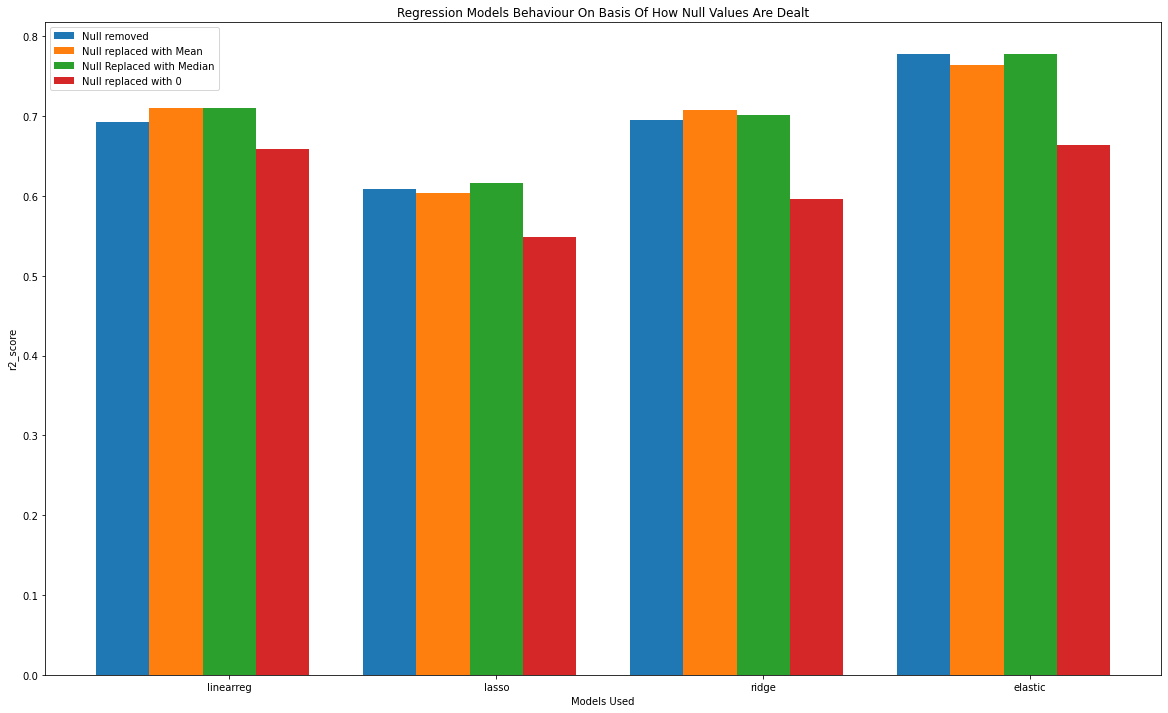

In [22]:
import matplotlib.pyplot as plt
import numpy as np
case1_accuracies = [accuracy11, accuracy21, accuracy31,accuracy41]
case2_accuracies  = [accuracy12, accuracy22, accuracy32,accuracy42]
case3_accuracies = [accuracy13, accuracy23, accuracy33,accuracy43]
case4_accuracies  = [accuracy14, accuracy24, accuracy34,accuracy44]

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(12)
model_names = ['linearreg','lasso','ridge','elastic']
X_axis = np.arange(len(model_names))
plt.bar(X_axis - 0.4,case1_accuracies, 0.2, label = 'Null removed')
plt.bar(X_axis - 0.2,case2_accuracies, 0.2, label = 'Null replaced with Mean')
plt.bar(X_axis,case3_accuracies, 0.2, label = 'Null Replaced with Median')
plt.bar(X_axis + 0.2,case4_accuracies, 0.2, label = 'Null replaced with 0')
plt.xticks(X_axis, model_names)
plt.title("Regression Models Behaviour On Basis Of How Null Values Are Dealt")
plt.xlabel("Models Used")
plt.ylabel("r2_score")
plt.legend()
plt.show()